In [1]:
import numpy as np
from descwl_coadd.coadd import MultiBandCoadds
from descwl_shear_sims import Sim
import matplotlib.pyplot as plt

In [2]:
dpi = 150
wcs_kws = dict(
    position_angle_range=(0, 360),
    scale_frac_std=0.1,
    dither_range=(-0.5, 0.5),
    shear_std=0.1,
)

rng = np.random.RandomState()

In [6]:
sim = Sim(
    rng=rng,
    epochs_per_band=2,
    wcs_kws=wcs_kws,
)
data = sim.gen_sim()

image-r-00.png


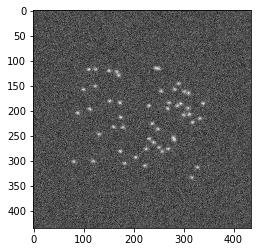

image-r-01.png


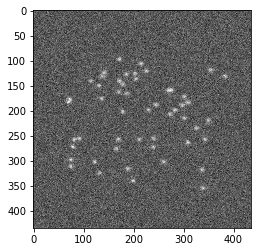

image-i-00.png


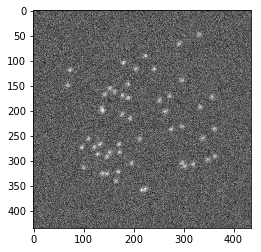

image-i-01.png


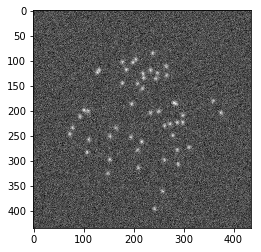

image-z-00.png


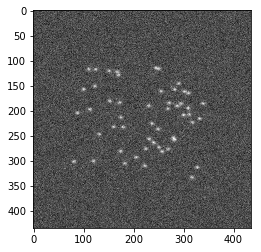

image-z-01.png


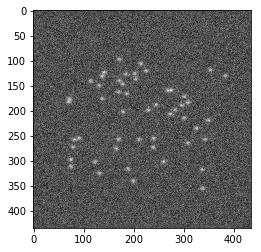

In [7]:
for band in data:
    bdata = data[band]

    for epoch, edata in enumerate(bdata):
        fname = 'image-%s-%02d.png' % (band, epoch)
        print(fname)
        plt.imshow(
            edata.image.array,
            interpolation='nearest',
            cmap='gray',
        )
        plt.show()

In [8]:
# coadding individual bands as well as over bands
coadd_dims = (sim.coadd_dim, )*2
coadds = MultiBandCoadds(
    data=data,
    coadd_wcs=sim._coadd_wcs,
    coadd_dims=coadd_dims,
    byband=False,
)

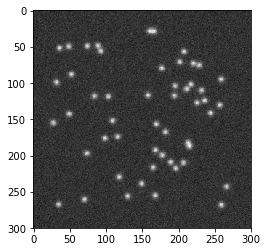

In [9]:
plt.imshow(
    coadds.coadds['all'].image,
    interpolation='nearest',
    cmap='gray',
)
plt.show()